# Graficar con matplotlib
Acá están replicados los ejemplos de la ppt

### Preparamos los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# la siguiente linea de código hace que los gráficos se muestren en el mismo notebook (y no en una ventana nueva)
%matplotlib inline
# es una configuración de jupyter notebook

In [ ]:
# abrimos archivo de potencia energética instalada en el país
df = pd.read_excel("potencia_instalada.xlsx")
# exploren la base. En la segunda hoja está la fuente.
df

,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo
0,2,2015-10-01,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,00:47:17.900000,4,10,2015-10
1,3,2015-10-01,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,00:47:17.900000,4,10,2015-10
2,4,2015-10-01,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,00:47:17.900000,4,10,2015-10
3,5,2015-10-01,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,00:47:17.900000,4,10,2015-10
4,6,2015-10-01,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,00:47:17.900000,4,10,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,12515,2019-04-01,AVEL,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,LITORAL,Gba - Litoral - Buenos Aires,BG,Renovable,Biogas,6.30,00:53:59.300000,46,4,2019-04
11494,12516,2019-04-01,TIN2FV,PSTINO2G,PQUE SOLAR TINOGASTA II,NOROESTE,Noa,FV,Renovable,Solar,7.00,00:53:59.300000,46,4,2019-04
11495,12517,2019-04-01,BIC2EO,PEBICE2G,P.EOLICO BICENTENARIO 2,PATAGONICA,Patagonia,EO,Renovable,Eólica,25.20,00:53:59.300000,46,4,2019-04
11496,12518,2019-04-01,BANDEO,PEBANDEG,P.EOLICO LA BANDERITA,COMAHUE,Comahue,EO,Renovable,Eólica,39.60,00:53:59.300000,46,4,2019-04


In [ ]:
# agregamos a nivel de tipo de fuente
df_fuente = df.groupby(by=["periodo","fuente_generacion"]).agg({"potencia_instalada_mw":"sum"})
df_fuente.reset_index(inplace=True)
df_fuente.sample(5)

,periodo,fuente_generacion,potencia_instalada_mw
150,2019-04-01,Renovable,1819.785
40,2016-08-01,Hidráulica,10619.700
145,2019-01-01,Nuclear,1755.000
31,2016-05-01,Térmica,20595.447
109,2018-01-01,Nuclear,1755.000


In [ ]:
# defino vectores de datos para serie 1
y1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["potencia_instalada_mw"]
x1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["periodo"]
# defino vectores de datos para serie 2
y2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["potencia_instalada_mw"]
x2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["periodo"]

### Ejemplo 1

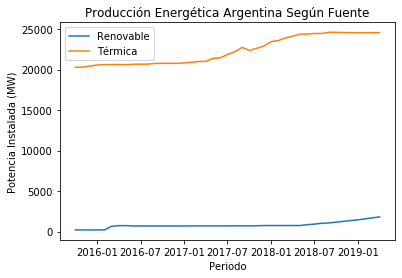

In [ ]:
# creo el grafico
plt.plot(x1,y1, label='Renovable') # serie 1
plt.plot(x2, y2, label='Térmica') # serie 2 sobre mismos ejes
# modifico labels
plt.xlabel('Periodo')
plt.ylabel('Potencia Instalada (MW)')
plt.title("Producción Energética Argentina Según Fuente")
# agrego leyenda
plt.legend()
plt.show() #esto es necesario para visualizar

### Ejemplo 2

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


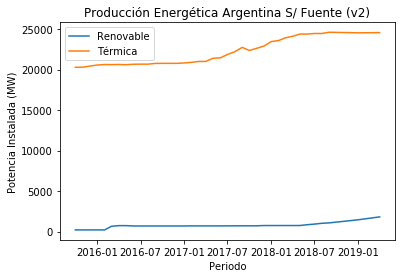

In [ ]:
# creo el figura y axes
fig, ax = plt.subplots()  # crear objetos

# defino series
ax.plot(x1, y1, label="Renovable")  # Serie 1
ax.plot(x2, y2, label='Térmica')  # Serie 2

# modifico labels
ax.set_xlabel('Periodo')
ax.set_ylabel('Potencia Instalada (MW)')
ax.set_title("Producción Energética Argentina S/ Fuente (v2)") 

# agrego leyenda
ax.legend()

fig.show()

### Ejemplo 3

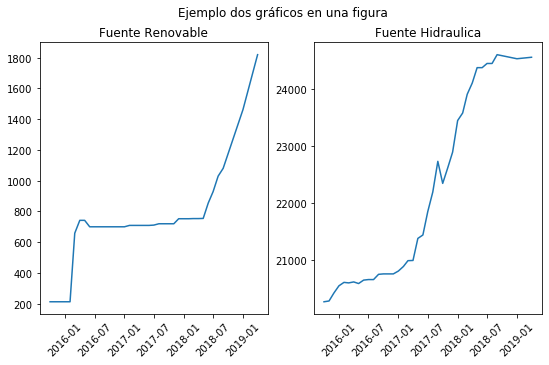

In [ ]:
# ejemplo 2 ax en un fig
plt.figure(figsize=(9, 5))

# defino primer grafico
plt.subplot(121)
plt.plot(x1, y1)
plt.title('Fuente Renovable')
plt.xticks(rotation=45) # valores eje x en diagonal

# defino segundo grafico
plt.subplot(122)
plt.plot(x2, y2)
plt.title('Fuente Hidraulica')
plt.xticks(rotation=45) # valores eje x en diagonal

# definto titulo general
plt.suptitle("Ejemplo dos gráficos en una figura")

plt.show()

# ipywidgets

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

In [ ]:
import datetime

In [ ]:
lista_fuentes = list(set(df_fuente['fuente_generacion']))
lista_fuentes

['Térmica', 'Hidráulica', 'Renovable', 'Nuclear']

In [ ]:
# Seleccionar tipo de fuente
print("Seleccionar Fuente:")
fuente = widgets.Dropdown(
    options=['Renovable', 'Nuclear', 'Hidráulica', 'Térmica'],
    value='Nuclear',
    description='Fuente:',
    disabled=False)
display(fuente)

Seleccionar Fuente:


Dropdown(description='Fuente:', index=1, options=('Renovable', 'Nuclear', 'Hidráulica', 'Térmica'), value='Nuc…

In [ ]:
fechas = list(set(df_fuente['periodo'].dt.strftime("'%y-%m")))
fechas.sort()

In [ ]:
select_fecha = widgets.SelectionRangeSlider(
    options=fechas,
    index=(0, 17),
    description='Fechas',
    disabled=False
)
display(select_fecha)

SelectionRangeSlider(description='Fechas', index=(0, 17), options=("'15-10", "'15-11", "'15-12", "'16-01", "'1…

In [ ]:
select_fecha.value

("'16-06", "'19-04")

In [ ]:
datetime.datetime.strptime(select_fecha.value[1], "'%y-%m")

datetime.datetime(2019, 4, 1, 0, 0)

Seleccionar Fuente:


Dropdown(description='Fuente:', index=1, options=('Renovable', 'Nuclear', 'Hidráulica', 'Térmica'), value='Nuc…

Seleccionar rango de fechas:


SelectionRangeSlider(description='Fechas', index=(0, 17), options=("'15-10", "'15-11", "'15-12", "'16-01", "'1…

Evolución de la potencia instalada de fuente: Nuclear


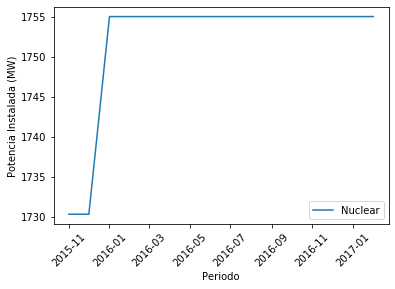

In [ ]:
# widget 1
lista_fuentes = list(set(df_fuente['fuente_generacion']))
# Seleccionar tipo de fuente
print("Seleccionar Fuente:")

fuente = widgets.Dropdown(
    options=['Renovable', 'Nuclear', 'Hidráulica', 'Térmica'],
    value='Nuclear',
    description='Fuente:',
    disabled=False)

display(fuente)

# widget 2
fechas = list(set(df_fuente['periodo'].dt.strftime("'%y-%m")))
fechas.sort()

print("Seleccionar rango de fechas:")
select_fecha = widgets.SelectionRangeSlider(
    options=fechas,
    index=(0, 17),
    description='Fechas',
    disabled=False
)
display(select_fecha)

#PARA USAR ESOS VALORES PONER ej: n.value o mark.value
df_temp =  df_fuente[df_fuente['fuente_generacion'] == fuente.value]

# extraigo objeto fecha de string
fecha_min = datetime.datetime.strptime(select_fecha.value[0], "'%y-%m") 
fecha_max = datetime.datetime.strptime(select_fecha.value[1], "'%y-%m")

# extraigo objeto fecha de string
df_temp = df_temp[(df_temp['periodo']>fecha_min)&(df_temp['periodo']<fecha_max)]

print("Evolución de la potencia instalada de fuente: {}".format(fuente.value))
# creo el grafico
plt.plot(df_temp['periodo'],df_temp['potencia_instalada_mw'], label=fuente.value) 
# modifico labels
plt.xlabel('Periodo')
plt.xticks(rotation=45)
plt.ylabel('Potencia Instalada (MW)')

# agrego leyenda
plt.legend()
plt.show()